## SURE - Dissemination - Joe Auty 


## On methods of fault detection in onshore windturbines. 

# Brief Overview of SHM

Structural Health Monitering (SHM) is a process that is based upon trying to identify whether damage is present in an engineering system. This is typcially acheived through a four stage process: operational evaluation; data acquisiton; feature selection and statistical modelling for feature selection. 

Having knowledge of whether a engineering system is damaged or not is of course very important for safety, however there are potential economic benefits to it also. It can limit economic losses due to downtime and can allow business to change from a time-based maintainece regime to a condition-based one, thus maximising profit for a particular system. 

Regression allows one to estimate a mathemetical relationship between variables.In the context of SHM, this means establishing a relationship between damage sensitive features of a system; those being variables whose values will change with the presence of damage within a system. A simple example of this is the natural freqency of a train wheel will change if a crack forms within it. Data is extracted from all possible damaged and undamaged states of a system and regression performed.

Once the relationship has been *learnt*, outlier analysis can be performed. Outlier analysis is essentially the fitting of a confidence interval for the data, such that if a particular data point exceeds this threshold from what is learnt to be *normal*, then that point can be considered novel. New data fron the system can either be considered to be *novel*, meaning something different has happened to the system ( physically what this is will be unknown ), or *not novel*, meaning it follows the trend which has been learnt. 


# Wind Turbine Data


The following plots show the unprocessed average power vs average windspeed data for three different wind turbines.The data is time averaged at 10 minute intervals, hence the discrete windspeed values. The overall trend is known as a power curve and is characterised by: 

- An intially flat region as windspeed increases. This is until the cut-in threshold wind speed is reached and the turbine starts to generate power. 
- A non-linear region, whereby power increases with windspeed.
- A flat region where the rated windspeed is reached, and the turbine can generate no additonal power for an increase in windspeed. 

The underlying physical relationship that governs the non-linear region is given by: 

$$p_{c}(v)=\frac{1}{2}A\rho v^3 $$

Where $ p_{c}(v) $ is the maximum, theoretically available power in Watts for a given windspeed $ v $ $m/s$, A is the area the rotor spans and $ \rho $ $ kg/m^3 $ is the air density. 

However, as can clearly be seen, the data is rather messy. Some of the seemingly rogue data points correspond to the turbine being shut down, some could be outliers due to faulty measurements and some could be due to damage within the system.


The plots show that sometimes the data points diverge from the expected power curve, displaying that less power is being generated under normal conditions; this is a typical indication of underlying damage. 
Using outlier analysis to analytically find these points will then allow one to find the time at which a certain turbine was damaged. 

The raw data for all three wind turbines is shown below, which inlcudes all the various operating states of the turbine: shutdown, connecting, generating and freewheeling. 

<Figure size 432x288 with 0 Axes>

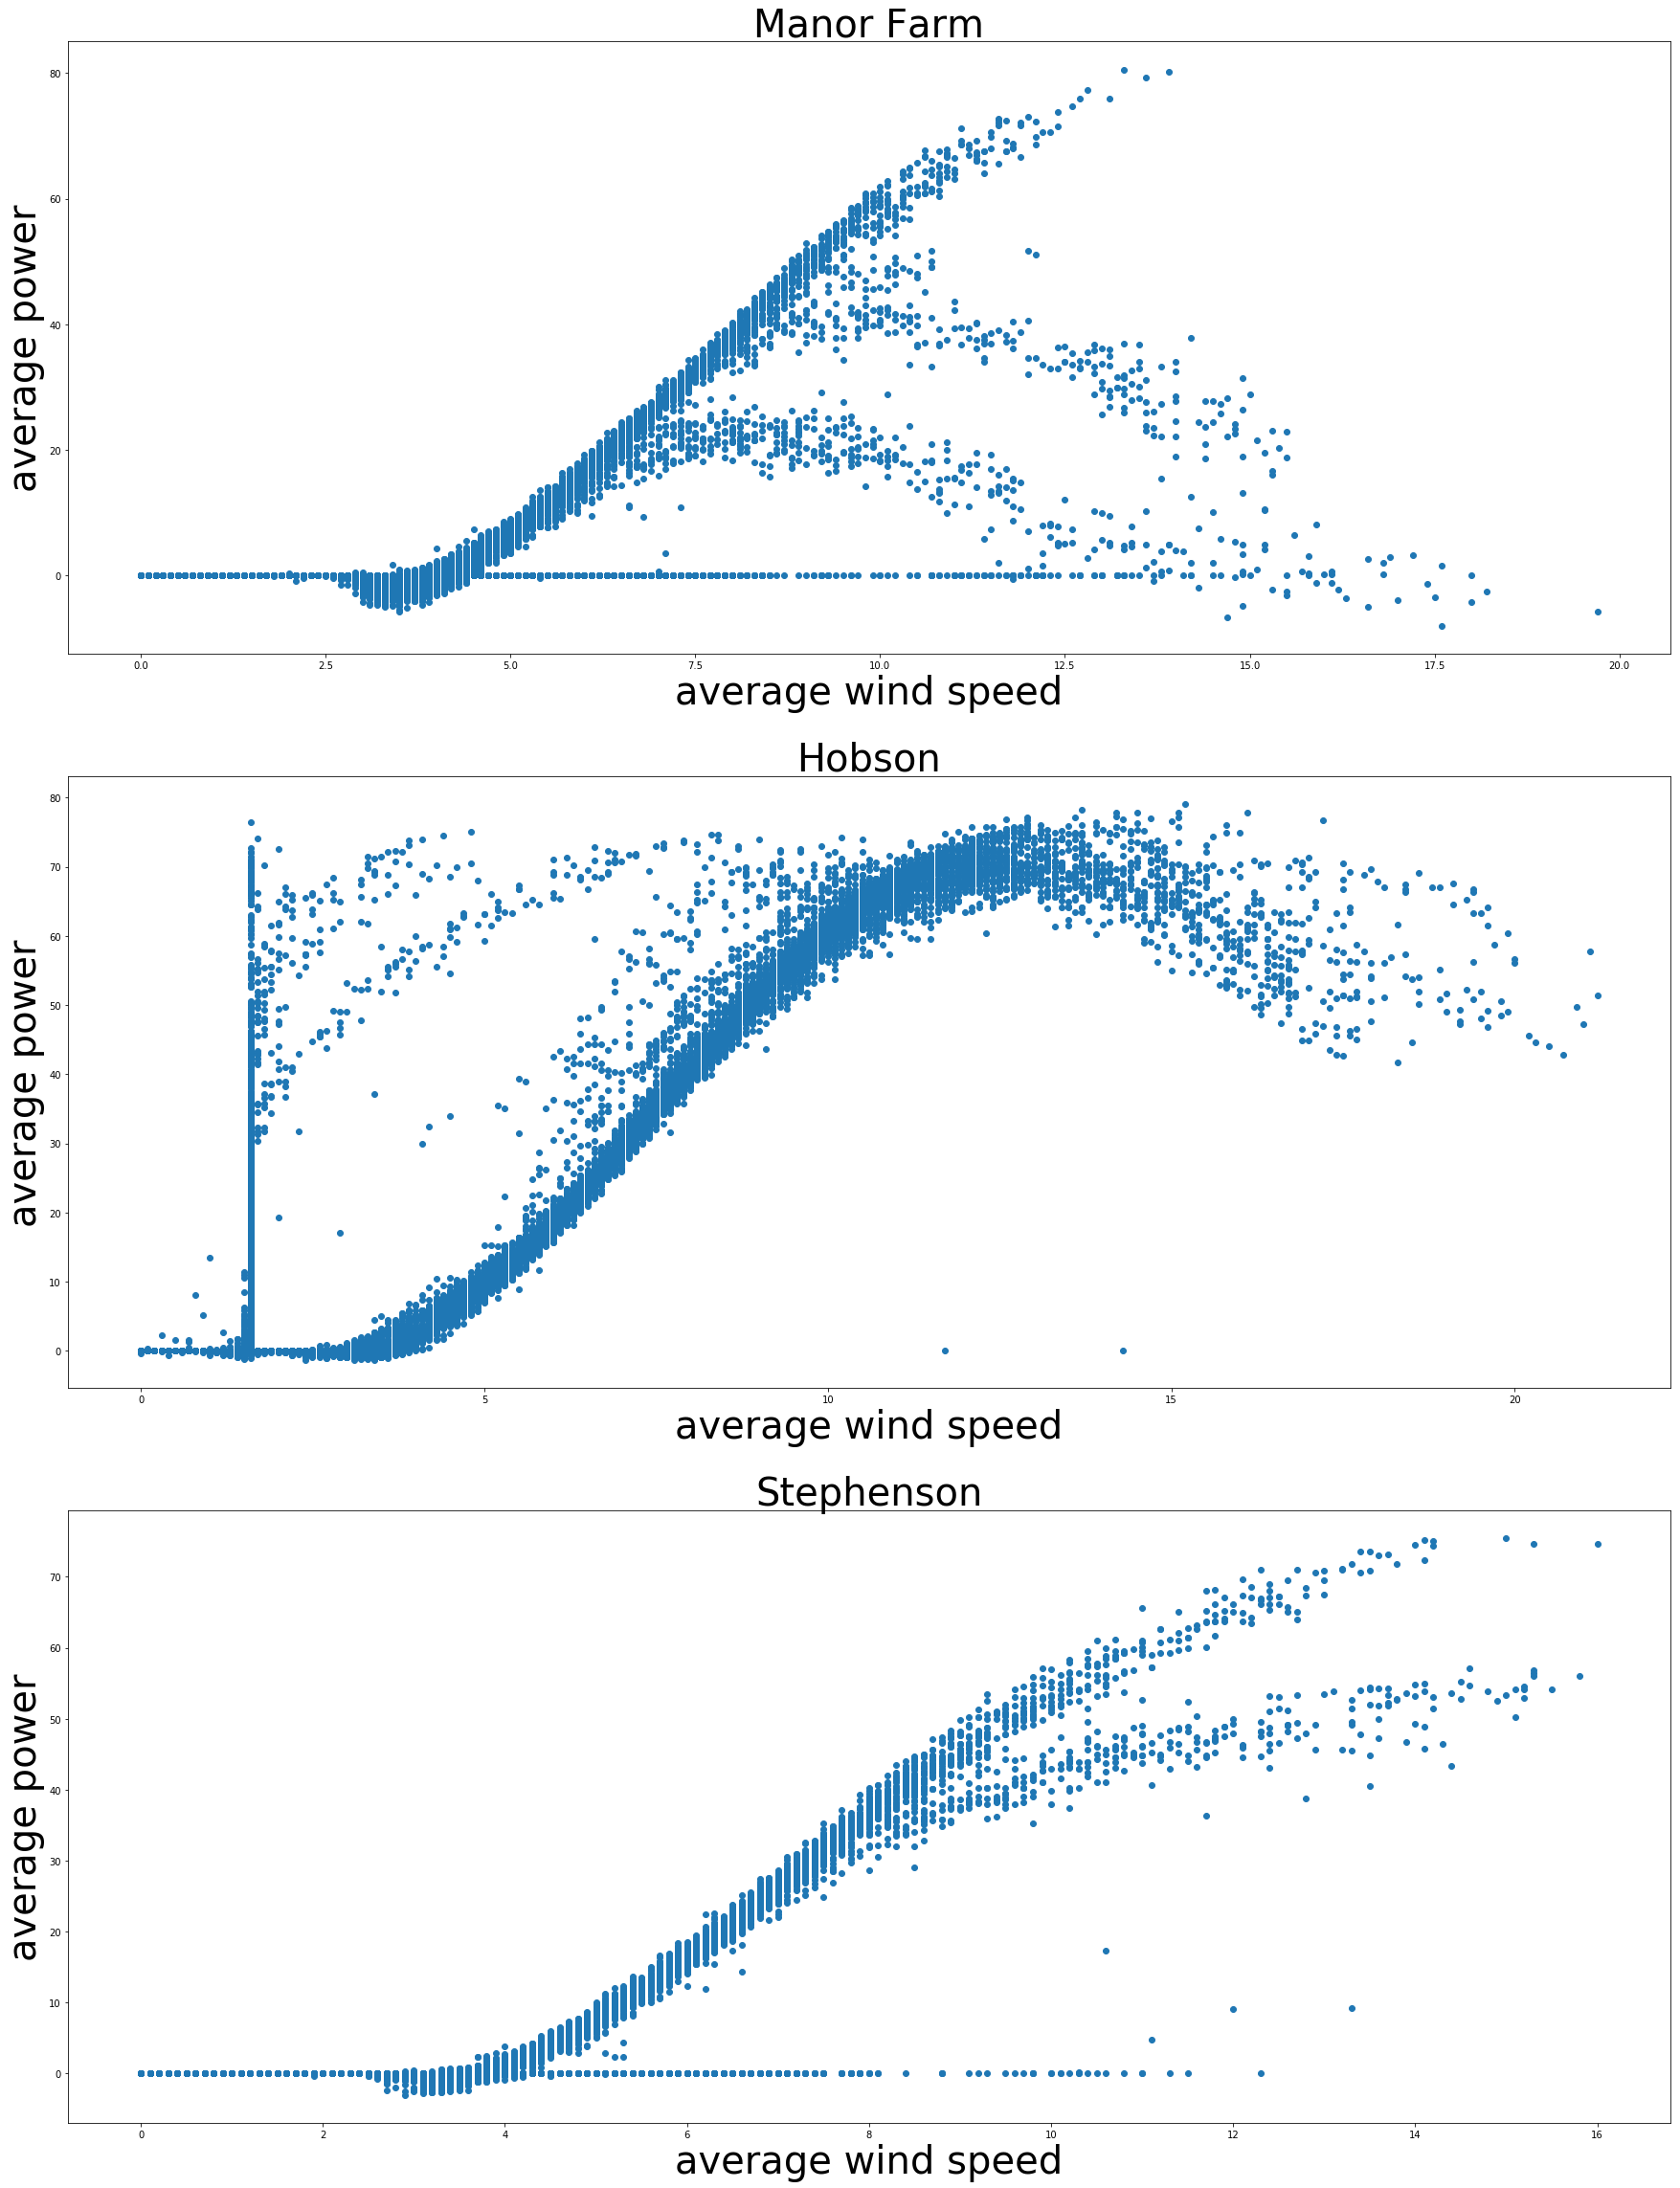

In [89]:
import pandas as pd
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt

data1=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data1.csv")
data2=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data2.csv")
data3=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data3.csv")
a=np.size(data1.power_avg)
y1,x1,z1=data1['power_avg'],data1['windspeed_avg'],data1['turbine_state']
y2,x2,y3,x3=data2['power_avg'],data2['windspeed_avg'],data3['power_avg'],data3['windspeed_avg']
t1,t2,t3=data1['timestamp'],data2['timestamp'],data3['timestamp']

plt.figure()
f = plt.figure(figsize=(30,40))
plt.subplot(311)
plt.scatter(x1,y1)
plt.xlabel('average wind speed',fontsize=40)
plt.ylabel('average power',fontsize=40)
plt.title('Manor Farm',fontsize=40)

plt.subplot(312)
plt.scatter(x2,y2)
plt.xlabel('average wind speed',fontsize=40)
plt.ylabel('average power',fontsize=40)
plt.title('Hobson',fontsize=40)

plt.subplot(313)
plt.scatter(x3,y3)
plt.xlabel('average wind speed',fontsize=40)
plt.ylabel('average power',fontsize=40)
plt.title('Stephenson',fontsize=40)

plt.show()

## Shutting down the turbines. 
At some point during their running, the turbines were turned off. The point at which they were turned off can be shown by plotting normalised windspeed and power in time order. For the times when the turbine is in the *generating* state and not  *free wheeling* or *connecting*, the power roughly correlated with windspeed, as expected. However at some time, located around the 12000th timestamp, the turbines were fully turned off by the operators when some sort of abnormality was suspected and no power is registered yet the anemometer is still recording the windspeed. This is the point that one would like to find analytically through regression. 

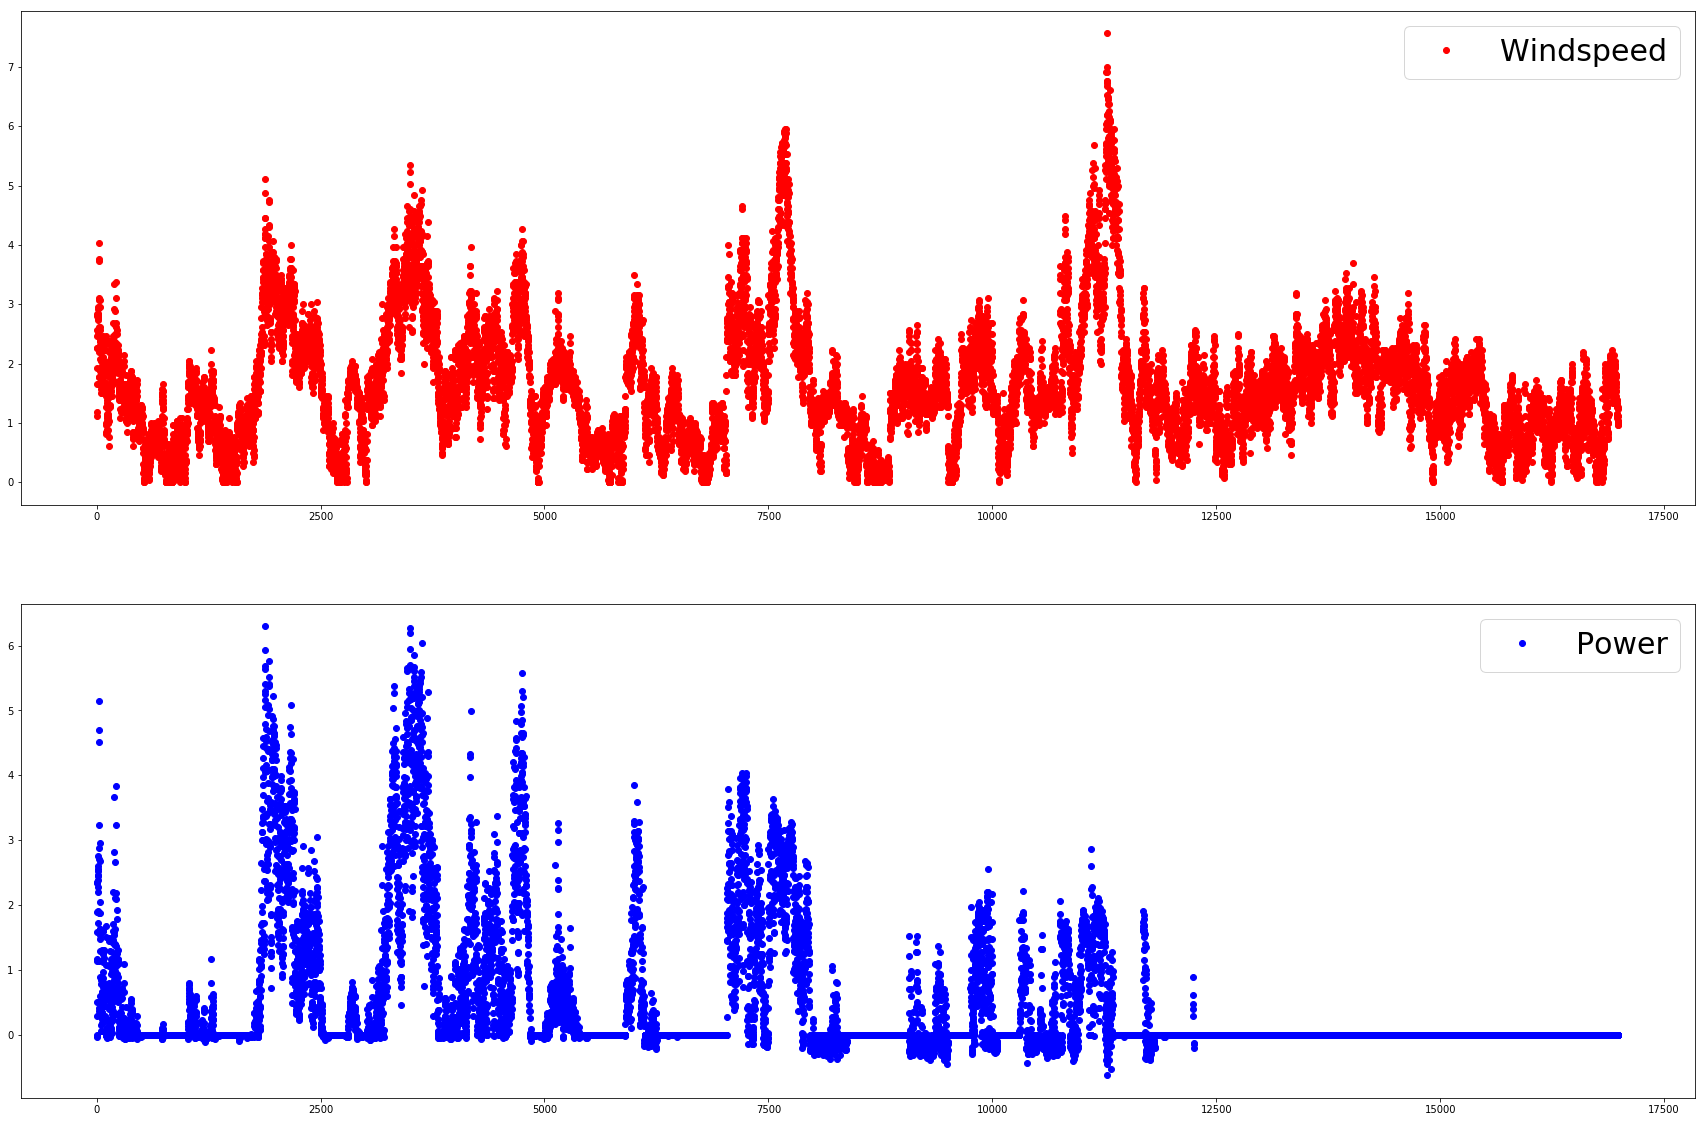

In [43]:
plt.figure(figsize=(30,20))
plt.subplot(211)
plt.plot((x1)/np.std(x1),'ro',label='Windspeed')
plt.legend(loc='upper right',fontsize=30)
plt.subplot(212)
plt.plot((y1)/np.std(y1),'bo',label='Power')
plt.legend(loc='upper right',fontsize=30)
plt.show()


# Regression and Outlier Analysis. 
## Least Squares
Least squares regression, also called frequentist regression, is a common form of regression by which the optimum function is found by minimising the sum of squares of the residuals, that is, the sum of the differences between the predicted value and its corresponding data point. 
We can say that a mathematical function that decribes the data set has the form: 

$$ f(x)=\epsilon+w_{0}+w_{1}f(x_{1})+w_{2}f(x_{2})+w_{3}f(x_{3})... $$ 

where $ \epsilon $ is constant noise, with a certain variance $ \sigma^{2} $ and zero mean ,$ f(x_{i}) $ is some function of $ x $ and $ w_{i} $ is a constant.

In matrix form it is given by: 

$$ Y=X^{T}W~ $$

Here we can say we have linear regression becuase our vector of weights function ($ W^{T} $) is a linear function of the basis function $ X_{i} $. The basis function is an $N$ by $K$ matrix, where $N$ is the number of data points and $K$ is the number of mathematical terms chosen. For example, one basis function that is subsquently trialled is $[ 1, tanh(x_{i}) ]$  

The sum of squares error ,$ L $, as mentioned previously is given by:

$$ L=\frac{1}{N}\sum_{i=1}^N (y_{i}-X_{i}W)^{2} $$

A solution for the weights that mimimises this expression (and thus optimises the fitted function) has a closed form solution, obtained through calculus: 

$$ W=(X^{T}X)^{-1}X^{T}Y $$

### Least Squares Application 

One single function may not necessarily descibe a whole dataset. It may be easier to seperate the data into sections, each with its own function. In this case, it is sensible to model from the zero wind-speed to the cut-in speed ($ v_{ci} $) as being a horizontal line, $ y=a_{1} $ and similarly, from the cut out speed ($ v_{co} $) onwards, as another horizontal line $ y=a_{2} $ and the non-linear section inbetween being the function found through linear regression. 

It follows that we neeed to define ($ v_{ci} $) and ($ v_{co} $) for the  purposes of regression as the speed at which the gradient of the function becomes greater than zero and the point at which it goes from some positive value to zero, respectively. We cannot differentiate the basis function becasue that would require the function to be trained across the whole range of windspeeds. This raises the point of at what windspeeds should we should select to  switch between the functions, which intiially seems tricky as there is a lot of data points surrounding (in particular) the cut in/out speeds, which seem to cloud their actual locations. One option is to average the power values for each repeated windspeed, and then numerically compute the gradient through linear regression. This process is shown below. 

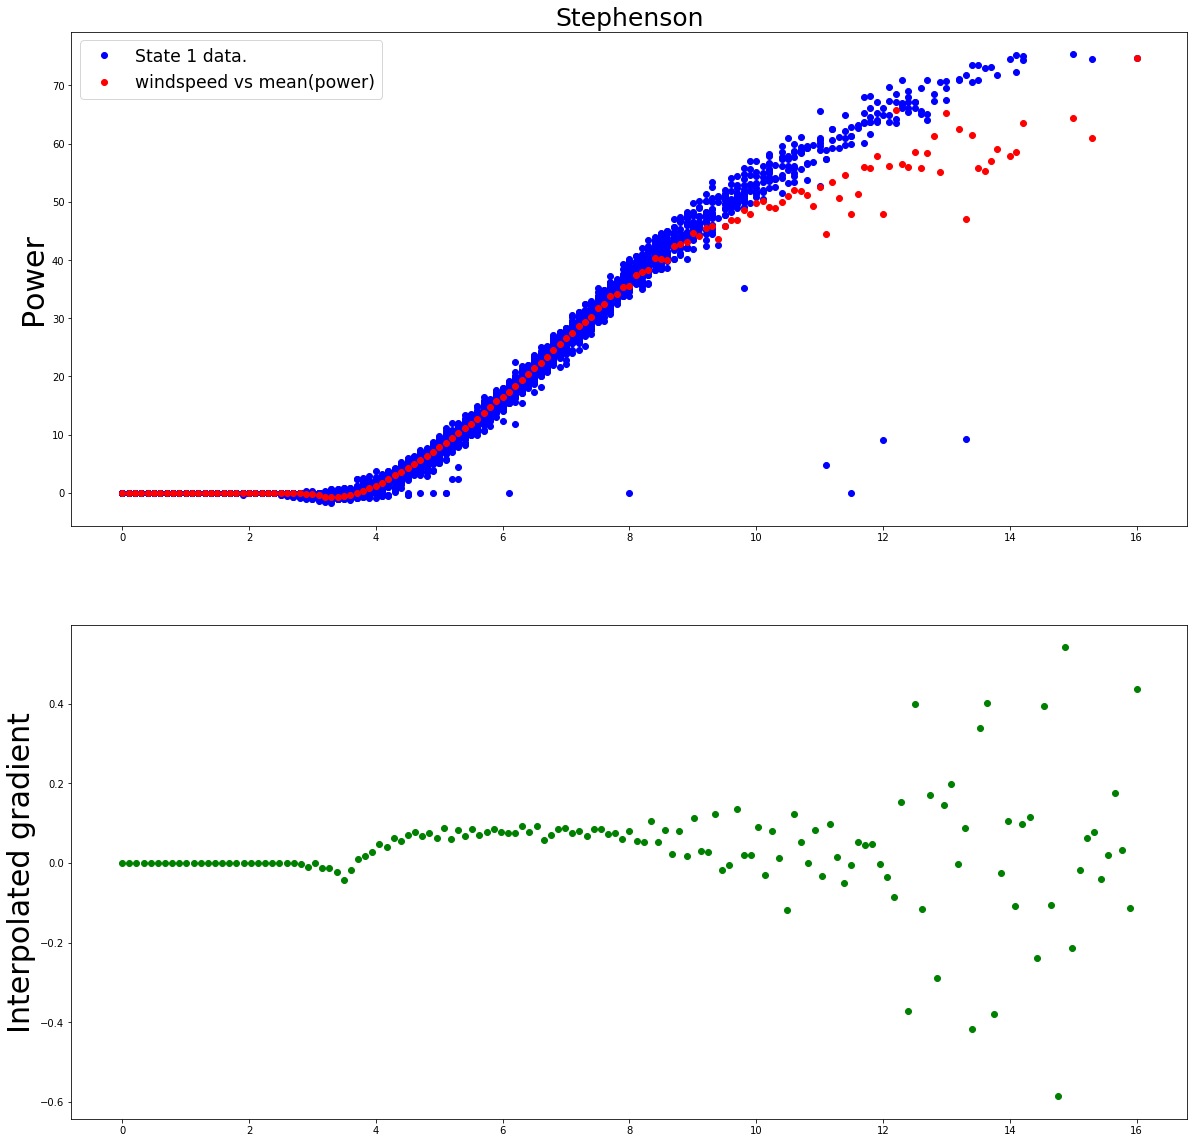

In [95]:
y3=data3['power_avg'];
x3=data3['windspeed_avg']
states=data3['turbine_state']
z=np.asarray(np.where(states!=0))#indexes where turbine is off. 
states_clean1=states[(states!=0)]#states excluding off-state. 
y3_cleaned=np.transpose(np.asarray([y3[i] for i in z]))#all data except where state=0. 
x3_cleaned=np.transpose(np.asarray([x3[i] for i in z]))
wholex=x3_cleaned
wholey=y3_cleaned
#calculating gradient for cut-off 
#arranging data into array
mat_grd=np.ones((len(wholex[0:10000]),2))#first 10000 data point to isolate 'undamaged states.'
mat_grd[:,0]=np.reshape(wholex[0:10000],(10000,))
mat_grd[:,1]=np.reshape(wholey[0:10000],(10000,))
np.sort(mat_grd,axis=0)#sorting matrix into ascending order based on x values 
# plt.figure(figsize=(20,10))#checking
# plt.plot(mat_grd[:,0],mat_grd[:,1],'bo')
repeats=np.unique(wholex[0:10000])#extracts unique x values./

repeatsy=np.ones_like(repeats)

# indexes=[]
# indexes=np.where(wholex=)
for i in range(0,len(repeats)):
    repeatsy[i]=np.mean(wholey[np.where(wholex==repeats[i])])
    
#print("repeats :", repeats, "repeatsy :", repeatsy)
grads=[]

for i in range(0,(len(repeats)-1)):
    m=(repeatsy[i+1]-repeatsy[i])/(repeats[i+1]+repeats[i])
    grads.append(m)
    

x_grads=np.linspace(np.amin(wholex),np.amax(wholex),len(grads))
#print("grads;",grads)
plt.figure(figsize=(20,20))#checking
plt.subplot(211)
plt.plot(mat_grd[:,0],mat_grd[:,1],'bo',label='State 1 data.')
plt.plot(repeats,repeatsy,'ro',label='windspeed vs mean(power)')# only shows x values that are repeated, which is probably why the red line becomes bad as x i increases
plt.ylabel('Power',fontsize=30)
plt.legend(loc='upper left',fontsize='xx-large')
plt.title('Stephenson',fontsize=25)
plt.subplot(212)
plt.plot(x_grads,grads,'go')
plt.ylabel('Interpolated gradient',fontsize=30)
plt.show()


## Testing Basis  Functions

Three fundamental functions were used in basis functions: the hyperbolic tan ($ tanh(x) $) , the sigmoid function ($ S(x)=(1+e^{-x})^{-1} $)   and a cubic ($x^{3}+x^{2}+x+1$). These fundamental functions can be manipulated to form many different basis sets. For example, one basis set could be $ [tanh(x) \enspace S(x) \enspace 1] $. Here the *'1'* term accounts for any vertical offsets offsets that the data may display. The following basis functions are shown below:

- $[1 \enspace tanh(x)]$
- $[1 \enspace S(x)]$
- $[1 \enspace x^{3} \enspace x^{2} \enspace x \enspace 1]$




In [4]:
#Functions. 


def preprocessing(arg1,arg2):
    import numpy as np
   
    arg2=np.array(arg2)

    z1=(arg1-np.mean(arg1))/(np.mean(arg1))
    z2=arg1/(np.std(arg1))
    z3=(arg2[1]-arg2[0])*((arg1-np.amin(arg1)*np.ones_like(arg1))/((np.amax(arg1))-np.amin(arg1)))+arg2[0]
    #not a smart function , you have to put in 2 inputs and request 3 outputs each time 
    return z1,z2,z3
#unnormalising functions
def denorm_std(z,x):
    import numpy as np 
    x_de=(z1*np.std(x))+np.mean(x)
    
    return x_de
def denorm_var(z,x):
    import numpy as np 
    return x_de
    x_de=z*np.std(x)
def denorm_range(z,lims,x):
    import numpy as np 
#     z=np.array(z)
    lims=np.array(lims)
#     x=np.array(x)
    x_de=(((z-lims[0]*(np.ones_like(z)))*(np.amax(x)-np.amin(x)))/(lims[1]-lims[0]))+np.amin(x)
    return x_de

#NMSE function
def nmse(yhat,y):
    N=len(yhat)
    nmse=100*(np.sum((yhat-y)**2)/(N*np.var(y)))
    return nmse

def rsquared(yhat,y,p):
    N=len(yhat)
    rquared=1-(((yhat-y)**2)/(y-np.mean(y))**2)
    rsquaredad=1-(1-rsquared)*((N-1)/(N-p-1))
    return rsquared,rsquaredad

    

In [45]:
#CUBIC 
##selecting better training data
from sklearn.utils import shuffle


#shuffling data for better Kvalidation
data_large=np.ones((10000,2))
data_large[:,0]=np.reshape(x3_cleaned[0:10000],(10000,))
data_large[:,1]=np.reshape(y3_cleaned[0:10000],(10000,))
data_large_shuff=shuffle(data_large,random_state=1)

#save as new x3_cleaned and y3_cleaned 
x3_cleaned=data_large_shuff[0:500,0]
y3_cleaned=data_large_shuff[0:500,1]
#trimming to get rid of flat bit at start 
index=np.array(np.where(x3_cleaned>=3.4))#indexes where x values are greater than 3.4
x_trim=x3_cleaned[(x3_cleaned>=3.4)]#x and y values satisfying x>3.4 condition. 
y_trim=np.transpose([y3_cleaned[i] for i in index])
length=len(x_trim)#lenth of trimmed data

#cubic 
N=length#legnth of cleaned and trimmed data. 
xb=np.ones((length,4))#basis set for cubic. 
x=x_trim
y1=y_trim
xb[:,0]=(np.transpose(x))**3
xb[:,1]=(np.transpose(x))**2
xb[:,2]=np.transpose(x)

#finding beta
t=np.transpose(xb)
i=np.matmul(t,xb)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,y1)))
y_hat=np.matmul(xb,beta)#prediction , cubic
mse=np.mean((y1-y_hat)**2)


##metrics 
## Kfold validatiion 
data=np.zeros((length,2))
data[:,0]=x
data[:,1]=np.reshape(y1,(length,))
errors=[]
from sklearn.model_selection import KFold 
kf=KFold(n_splits=10,shuffle=False,random_state=1)
for train,test in kf.split(y_hat): #getting indexes
#     print("TRAIN:", train, "TEST:",test)
    train_data=np.array(data)[train]
    test_data=np.array(data)[test] # returns 10 items of training data ( 270 ) and testing data (30)
    #training basis set
    length_val=len(train_data[:,1])
    xb_val=np.ones((length_val,4))

    xb_val[:,0]=(np.transpose(train_data[:,0]))**3
    xb_val[:,1]=(np.transpose(train_data[:,0]))**2
    xb_val[:,2]=np.transpose(train_data[:,0])
    #calculating beta

    t_val=np.transpose(xb_val)
    i_val=np.matmul(t_val,xb_val)
    beta_val=np.matmul((np.linalg.inv(i_val)),(np.matmul(t_val,train_data[:,1])))
    #testing basis set
    length_val=len(test_data[:,1])
    xb_test=np.ones((length_val,4))

    xb_test[:,0]=(np.transpose(test_data[:,0]))**3
    xb_test[:,1]=(np.transpose(test_data[:,0]))**2
    xb_test[:,2]=np.transpose(test_data[:,0])
    #computing ls fit
    y_hat_val=np.matmul(xb_test,beta_val)
    metric=nmse(y_hat_val,test_data[:,1])
    
    errors.extend([nmse(y_hat_val,test_data[:,1])])
    score=np.mean(errors)
# print("ERRORS : ",errors,"NMSE_ AVG :",score)


In [46]:
##Outlier analysis
#cubic 

#undamaged data
y3_out=np.reshape(np.array(wholey[0:10000]),(10000,))
x3_out=np.reshape(np.array(wholex[0:10000]),(10000,))
z=np.where((x3_out>=3.6) & (x3_out<=14.2))#trimming indexes/
y3_cleaned_out=np.transpose(np.asarray([y3_out[i] for i in z]))
x3_cleaned_out=np.transpose(np.asarray([x3_out[i] for i in z]))

# #basis set.
#training on whole undamaged data


z1_y,z2_y,z3_y=preprocessing(y3_cleaned,[-1,1])
z1_y,z2_y,z3_y=preprocessing(x3_cleaned,[-1,1])
N_out=len(y3_cleaned_out)
xb=np.ones((N_out,4))
xb[:,0]=(np.transpose(x3_cleaned_out))**3
xb[:,1]=(np.transpose(x3_cleaned_out))**2
xb[:,2]=np.transpose(x3_cleaned_out)
# xb[:,3]=np.transpose(x3_cleaned_out)**4
#finding beta
t=np.transpose(xb)
i=np.matmul(t,xb)
beta_outlier=np.matmul((np.linalg.inv(i)),(np.matmul(t,y3_cleaned_out)))#trained beta
y_hat_out=np.matmul(xb,beta_outlier)

#basis set for outlier analysis
np.reshape(np.array(wholey),(len(wholey),))#all data inc 'damaged' part
np.reshape(np.array(wholex),(len(wholey),))

lol1=np.where((wholex<=14.2))#indeces
lol2=np.where((wholex>=3.6))
lol3=np.intersect1d(lol1,lol2)
haha=wholey[lol3]#all y data between limits
haha1=wholex[lol3]#all x data between limits

Xres=np.linspace(3.6,14.2,num=len(wholex[(wholex>=3.6) & (wholex<=14.2)]))

#res_index=np.where((wholex>=3.6) & (wholex<=14.2))
#Y_for_res=wholey[res_index]

# lol=np.where((wholex>=3.6) & (wholex<=14.2))
# Y_for_res=np.transpose(np.asarray([wholey[i] for i in lol]))


#np.reshape(Y_for_res,(7209,1))
N_out=len(haha1)
xb=np.ones((N_out,4))
xb[:,0]=(np.transpose(haha1))**3
xb[:,1]=(np.transpose(haha1))**2
xb[:,2]=np.transpose(haha1)
y_hat_out2=np.matmul(xb,beta_outlier)
np.reshape(y_hat_out2,(7209,))
# xb[:,3]=np.transpose(x3_cleaned_out)**4


res=[]
#calculating residuals
for i in range(0,len(y_hat_out2)):
    h=(y_hat_out2[i,0]-haha[i])**2
    res.append(h)
#res=(y_hat_out2-Y_for_res)


In [7]:
#tanh on whole data set
y3_out=np.reshape(np.array(wholey[0:10000]),(10000,))
x3_out=np.reshape(np.array(wholex[0:10000]),(10000,))
z=np.where((x3_out>=3.6) & (x3_out<=14.2))
y3_cleaned_out=np.transpose(np.asarray([y3_out[i] for i in z]))
x3_cleaned_out=np.transpose(np.asarray([x3_out[i] for i in z]))


length10000=len(wholex[0:10000])
x_train=wholex[0:10000]#training data , cleaned
y_train=wholey[0:10000]
z=np.where((x_train>=3.6) & (x_train<=14.2))
x_train=x_train[z]#training on all data that has been cleaned and trimmed/ 
y_train=y_train[z]
new_length=len(x_train)#new length, acccounting for upper limit trim. 
z1_y,z2_y,z3_y=preprocessing(y_train,[-1,1])#preprocessing y 
z1_x,z2_x,z3_x=preprocessing(x_train,[-1,1])#preporcessing x
X_full=np.ones((new_length,2))#basis set,[tanh 1]
X_full[:,0]=np.reshape(np.tanh(z3_x),(new_length,)) #basis set is [1 tanh]. #uses z3 i.e. z values between limits

# #beta 
t_tanh=np.transpose(X_full)
i_tanh=np.matmul(t_tanh,X_full)
beta_tanh=np.matmul((np.linalg.inv(i_tanh)),(np.matmul(t_tanh,z3_y)))#using scaled pre processsing for y

y_hat_tanh=np.matmul(X_full,beta_tanh)

# #de-normalising 
x_lims=np.array([-1,1])
y_lims=np.array([-1,1])

y_de=denorm_range(y_hat_tanh,y_lims,y_train)
#x_de=denorm_std(y_hat_tanh,x_train)

# plt.figure()
# plt.figure(figsize=(20,10))
# plt.plot(wholex,wholey,'ro',label='data')
# plt.plot(x_train,y_de,'bo',label='tanh LS fit')
# plt.title('Tanh-denormalised',fontsize=40)
# plt.show()








In [8]:
##sigmoid using preprocessing function
###sigmoid 
# x_data=x3_cleaned
# y_data=y3_cleaned 
x_data=x_trim
y_data=y_trim
#pre processing
z1_y,z2_y,z3_y=preprocessing(y_data,[0,1])
z1_x,z2_x,z3_x=preprocessing(x_data,[-3,3])

#basis set
X=np.ones((length,2))
X[:,0]=(1)/(1+np.exp((-0.8)*(z3_x)))


#beta 
t_sig=np.transpose(X)
i_sig=np.matmul(t_sig,X)
beta_sig=np.matmul((np.linalg.inv(i_sig)),(np.matmul(t_sig,z3_y)))

# #fitting
y_hat_sig=np.matmul(X,beta_sig)


#de-normalising -#need to code a demornlaising function 
x_lims=np.array([-3,3])
y_lims=np.array([0,1])

y_de=denorm_range(y_hat_sig,y_lims,y_data)

##figure 
# plt.figure()
# plt.figure(figsize=(20,10))
# plt.plot(x_data,y_de,'bo')
# plt.plot(x_data,y_data,'ro')

# plt.title('sigmoid-denormlalised',fontsize=30)
# plt.show()

#kfold vbalidation to select parameters 
#sigmoid on whole data set 
##Outlier analysis


y3_out=np.reshape(np.array(wholey[0:10000]),(10000,))
x3_out=np.reshape(np.array(wholex[0:10000]),(10000,))

# z2=np.array(np.where(x3_out>=3.2))
# z=np.array(np.where(states!=0)) 

z=np.where((x3_out>=3.6) & (x3_out<=14.2))
y3_cleaned_outS=np.transpose(np.asarray([y3_out[i] for i in z]))
x3_cleaned_outS=np.transpose(np.asarray([x3_out[i] for i in z]))

z1_y,z2_y,z3_y=preprocessing(y3_cleaned_outS,[0,1])
z1_x,z2_x,z3_x=preprocessing(x3_cleaned_outS,[-3,3])


# #basis set
N_outS=len(y3_cleaned_outS)
xb_whole=np.ones((N_outS,2))
xb_whole[:,0]=np.reshape((1)/(1+np.exp((-0.7)*(z3_x))),(N_outS,))



t=np.transpose(xb_whole)
i=np.matmul(t,xb_whole)
beta=np.matmul((np.linalg.inv(i)),(np.matmul(t,z3_y)))

y_hat_outS=np.matmul(xb_whole,beta_sig)

#de-normalising 
x_lims=np.array([-3,3])
y_lims=np.array([0,1])
y_de=denorm_range(y_hat_outS,y_lims,y3_cleaned_outS)


# #basis set for outlier 
# N_outS2=len(wholey)
# xb_whole2=np.ones((N_outS2,2))
# xb_whole2[:,0]=np.reshape((1)/(1+np.exp((-0.9)*(z3_x))),(N_outS2,))


# res=(y_de-y3_cleaned_outS)**2
# plt.figure()
# plt.figure(figsize=(20,10))
# #plt.plot(res,'rx')
# plt.show
# plt.figure(figsize=(20,10))
# plt.plot(wholex,wholey,'ro')
# plt.plot(x3_cleaned_outS,y_de,'bo')
# plt.title('Sigmoid trained on all data',fontsize=23)
# plt.show()

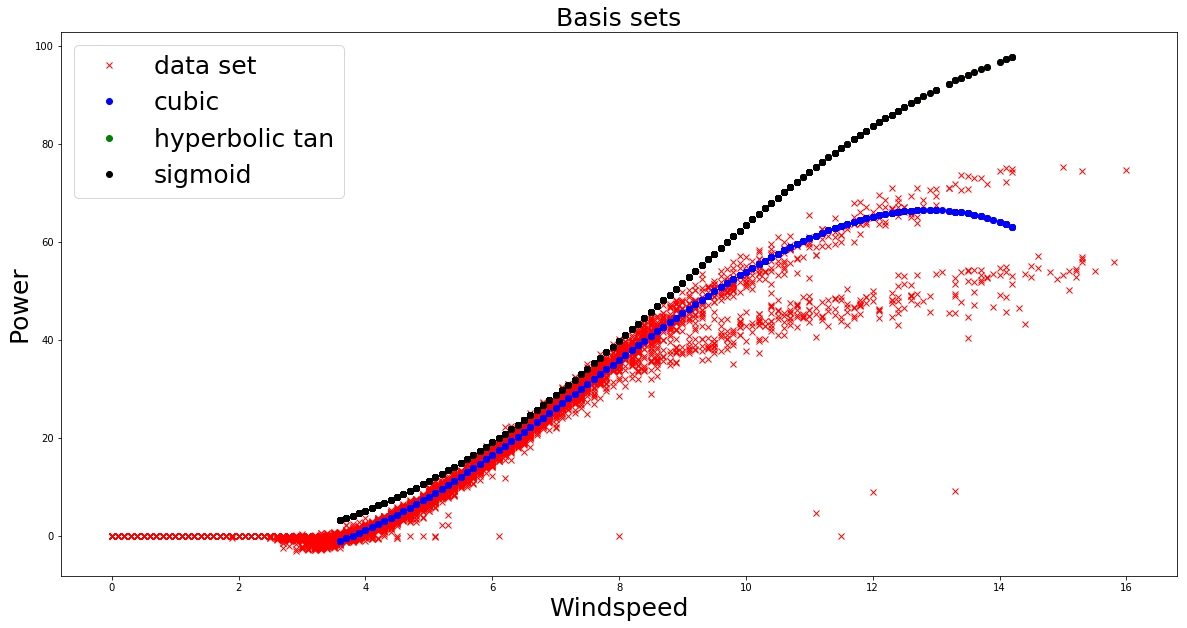

In [105]:
plt.figure(figsize=(20,10))
plt.plot(wholex,wholey,'rx',label='data set')
plt.plot(haha1,y_hat_out2,'bo',label='cubic')
plt.plot(x_train,y_de,'go',label='hyperbolic tan')
plt.plot(x3_cleaned_outS,y_de,'ko',label='sigmoid')
plt.title('Basis sets',fontsize=25)
plt.ylabel('Power',fontsize=25)
plt.xlabel('Windspeed',fontsize=25)
plt.legend(loc='upper left',fontsize=25)
plt.show()
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')



The cubic and hyperbolic tan basis functions both seemed to model the data quite well. However their accuracy seemed to decrease as the density of the data points decreased at higher windspeeds. Accurately modelling the sigmoid functions proved to be difficult; this could be due to the lack of ability to optimize the logistic growth rate (the coefficent of the exponent) within the function, as discussed below. 

### Cross Validation
Cross validation is method of assessing how transferrable the results of a particular regression are. It can also be used to yield metrics to compare different basis functions. 
The crux of data-driven methods as a means of SHM is that we can *train*  a model on some training data, then later  *test* our model on a different, testing data set to assess whether particular data can be deemed to be novel or not. Cross validation provides us with a means of gauging  the reliability with which we can do this. For instance it can highlight cases of overfitting. 

Cross validation allows direct comparison between various basis functions, through the use of comparitive metrics and it also allows a particlar basis set to be optimised. 
In this case, optimsation means the selection of the best parameters for terms within the basis set which cannot be influenced by the regression procedure. For example, if we have the basis set $ [S(x) \enspace 1] $, the elements of the weights vector  $W$ that is produced though linear regression only gives the multiplication factor of the terms within the basis set; i.e it cannot predict variables within the basis set terms themselves. The sigmoid term can be manipulated through the *logistic growth rate* ,k, such that $ S(x)=(1+e^{-kx})^{-1} $. One method of finding the optimum values of such constant coukd be found through K fold validation. 

## Novelty detection 
Residual error for a particular data point $ (x_{i},y_{i}) $ can be defined as:
$$ y_{i}-(X_{i}W)^{2} $$ 
It represents how different a particular data point is from the expected value. This metric can used to detect novelty in oncoming data. If the residual error exceeds some threshold, to be determined, then that data point can be considered novel, meaning *something* has happened to the turbine in order to yield such an unexpected result. 

The figure below shows novelty detection applied to the cubic basis function. The function was *trained* on undamaged data, i.e data that follows the expected non-linear trend as previously mentioned, this produced a $[W]$ vector. This vector was multiplied by the same basis set, but with a length found from the total number of *damaged* and *undamaged* data points between the two traning limits. This vector is then subtracted from the vector of power values from the corresponding data points to give the residual error.

To obtain a novelty threshold for the residual errors, one must consider the noisy nature of the data set. As mentioned previously, the data is considered to have noise, centered about the mean value, with normal distribution i.e a  mean of zero and variance of $ \sigma^{2} $. If this noise is assumed to be constant across the domain (which isn't necessarily true), then a cut-off point can be chosen by condidering the feature of a Guassian distribtion that 99% of the data points must lie within $ -3\sigma<0<3\sigma $. 

<Figure size 432x288 with 0 Axes>

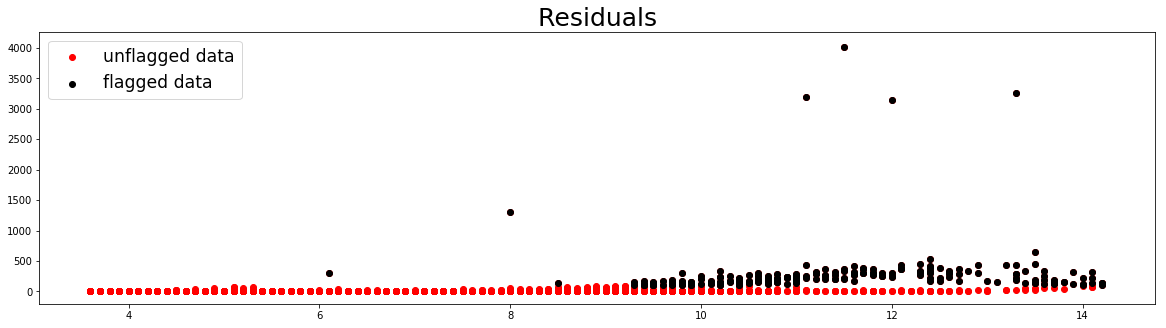

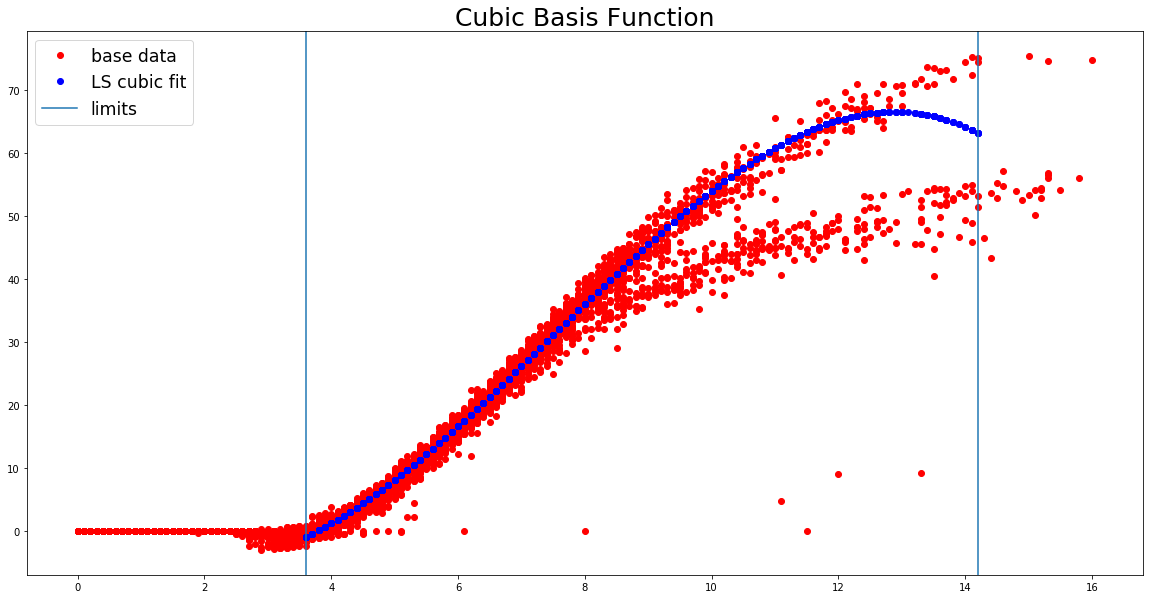

In [96]:
outliers_cubic=np.transpose(np.asarray(np.where(np.reshape(np.asarray(res),(len(res),))>=100)))
outliers_cubic_1=np.reshape(outliers_cubic,(len(outliers_cubic),))
res_out1=np.asarray(res)

plt.figure()
plt.figure(figsize=(20,5))
plt.title('Residuals',fontsize=25)
plt.scatter(haha1,res,c='r',label='unflagged data')
plt.scatter(haha1[outliers_cubic_1],res_out1[outliers_cubic_1],c='k',label='flagged data')
plt.legend(fontsize='xx-large')


plt.show
plt.figure(figsize=(20,10))
plt.plot(wholex,wholey,'ro',label='base data')
plt.plot(haha1,y_hat_out2,'bo',label='LS cubic fit')
plt.title('Cubic Basis Function',fontsize=25)
plt.axvline(x=14.2,label='limits')
plt.axvline(x=3.6)
plt.legend(loc='upper left',fontsize='xx-large')
plt.show()
metric=nmse(y_hat_out,y3_cleaned_out)
# print("nmse : ", metric)


# Bayesian Linear Regression. 
A Bayesian approcah to linear regression assumes the  noise of the data is distributed normally, and accounts for it; the regression is formulated using probability distributions as opposed to point estimates. In the Bayesian approach, the model parameters have an associated probability distribution.
The data is supplemented with a *prior probability distribution* , which represents the belief of what the paramters will be, before the data is observed. A *posterior* distribution of the parameters is cereated by combining the prior with the liklihood of the data point. 

Bayes' Rule is used to update the posterior: 

$$ P(W \vert y,X)= \frac{P(y\vert W, X)*P(y \vert X)}{P(y \vert X)} $$

where $P(y\vert W, X)$ is the likihood of the data, $P(W \vert X)$ os the prior porbability of the model parameters and $P(y \vert X)$ is a regularization term.

This results in a predicted output with a normal distribution

$$y\sim \mathcal{N}(W^{T}X,\sigma^{2}I)$$



## Maths of Bayesian Linear Regression
As metioned previously, with Bayesian Linear Regression, we assumed the model paramters have an associated Guasssian distribution, this is given by: 

$$ \beta \sim \mathcal{N}(\mu_{W},C_{W})$$

where $C_{\beta}=[\sigma^{-2}X^{T}X+\alpha^{-1}I]^{-1}$ and $\mu_{W}=C_{W}\sigma^{-2}X^{T}y$

The posterior mean of beta, given the data, is given by:

$$\mu_{W}=[\sigma^{-2}X^{T}X+\alpha^{-1}I]^{-1}\sigma^{-2}X^{T}y$$



In [11]:
y3=data3['power_avg'];
x3=data3['windspeed_avg']
states=data3['turbine_state']
z=np.asarray(np.where(states!=0))
states_clean1=states[(states!=0)]


y3_cleaned=np.transpose(np.asarray([y3[i] for i in z]))
x3_cleaned=np.transpose(np.asarray([x3[i] for i in z]))
z2_1=np.asarray(np.where((x3_cleaned>=3.4)))
z2_2=np.asarray(np.where((x3_cleaned<=14.2)))
lol=np.intersect1d(z2_1,z2_2)
x3_cleaned2=x3_cleaned[lol]
y3_cleaned2=y3_cleaned[lol]
              
wholex=x3_cleaned2[4000:5000]
wholey=y3_cleaned2[4000:5000]

# plt.figure()
# plt.figure(figsize=(20,10))
# plt.plot(x3_cleaned2[0:7000],y3_cleaned2[0:7000],'bo')
# plt.show()




def Bayes_reg(x_train,y_train,x_test,y_test,sigma2,alpha,num_basis):
    N=len(x_train)
    sig_inv=1/sigma2
    def polynomial(x,num_basis):
        X=np.ones((len(x),(num_basis+1)))# creates N by num_basis+1 matrix
        x1=np.reshape(x,(len(x),))
        for i in range(1,num_basis+1):
            
            X[:,i]=x1**i
        return (X)


       
    X=polynomial(x_train,num_basis)#creates basis set up to max polynomial order of num_basis
         
        
    
    #calculate the posterior mean and var of beta, given the data.
    Beta_cov=np.linalg.inv(sig_inv*np.matmul(np.transpose(X),X)+(1/alpha)*np.identity(num_basis+1))#covariance matrix beta_cov=(sigma^-2*X^T*x+alpha^-1*I)**(-1)
    Beta_mean=np.matmul(Beta_cov*(sig_inv),np.matmul(np.transpose(X),y_train))#beta_mean=beta_cov*sig^-2*X^T*Y
    #prediction
    y_mean=np.matmul((X),Beta_mean)
    
    y_cov=np.matmul(np.matmul(X,Beta_cov),np.transpose(X))
    y_var=np.diag(y_cov)#extracts diagonal of cov matrix, which is the variance.
    y_std=np.sqrt(y_var)
    y_std_re=np.reshape(y_std,(len(y_std),1))
    
    #testing data/
    X_test=polynomial(x_test,num_basis)#testign basis set. 
    y_mean_test=np.matmul((X_test),Beta_mean)
    y_cov_test=np.matmul(np.matmul(X_test,Beta_cov),np.transpose(X_test))
    y_var_test=np.diag(y_cov_test)#extracts diagonal of cov matrix, which is the variance.
    y_std_test=np.sqrt(y_var_test)
    y_std_test_re=np.reshape(y_std_test,(len(y_std_test),1))
    
    plt.figure(figsize=(30,30))
    plt.subplot(211)
    plt.plot(x_train,y_train,'rx',label='data')
    plt.plot(x_train,y_mean,'bo',label='y mean')
    plt.plot(x_train,(y_mean+(3*y_std_re)),'go',label='+3*std')
    plt.plot(x_train,(y_mean-(3*y_std_re)),'mo',label='-3*std')
    plt.plot(x_train,(y_mean+(3*(y_std_re+np.sqrt(sigma2)))),'co',label='+3*(std+sqrt(sigma2))')
    plt.plot(x_train,(y_mean-(3*(y_std_re+np.sqrt(sigma2)))),'ko',label='-3*(std+sqrt(sigma2))')
    plt.title('Training',fontsize=25)
    plt.legend(loc='upper left',fontsize=25)
    plt.subplot(212)
    plt.plot(x_test,y_test,'ro')
    plt.plot(x_test,y_mean_test,'bo',label='y mean')
    plt.plot(x_test,(y_mean_test+(3*y_std_test_re)),'go',label='+3*std')
    plt.plot(x_test,(y_mean_test-(3*y_std_test_re)),'go',label='-3*std')
    plt.title('Testing on 1000 points',fontsize=25)
    plt.legend(loc='upper left',fontsize=25)
    
    plt.show()
    
    return (y_mean,y_std_re,Beta_mean,Beta_cov)
    
    

## Example of Bayesian Regression. 
The following example displays the training/testing procedure of Bayesian regression. Whereby the data is *trained* on 7000 data points and *tested* on 1000 data points. 

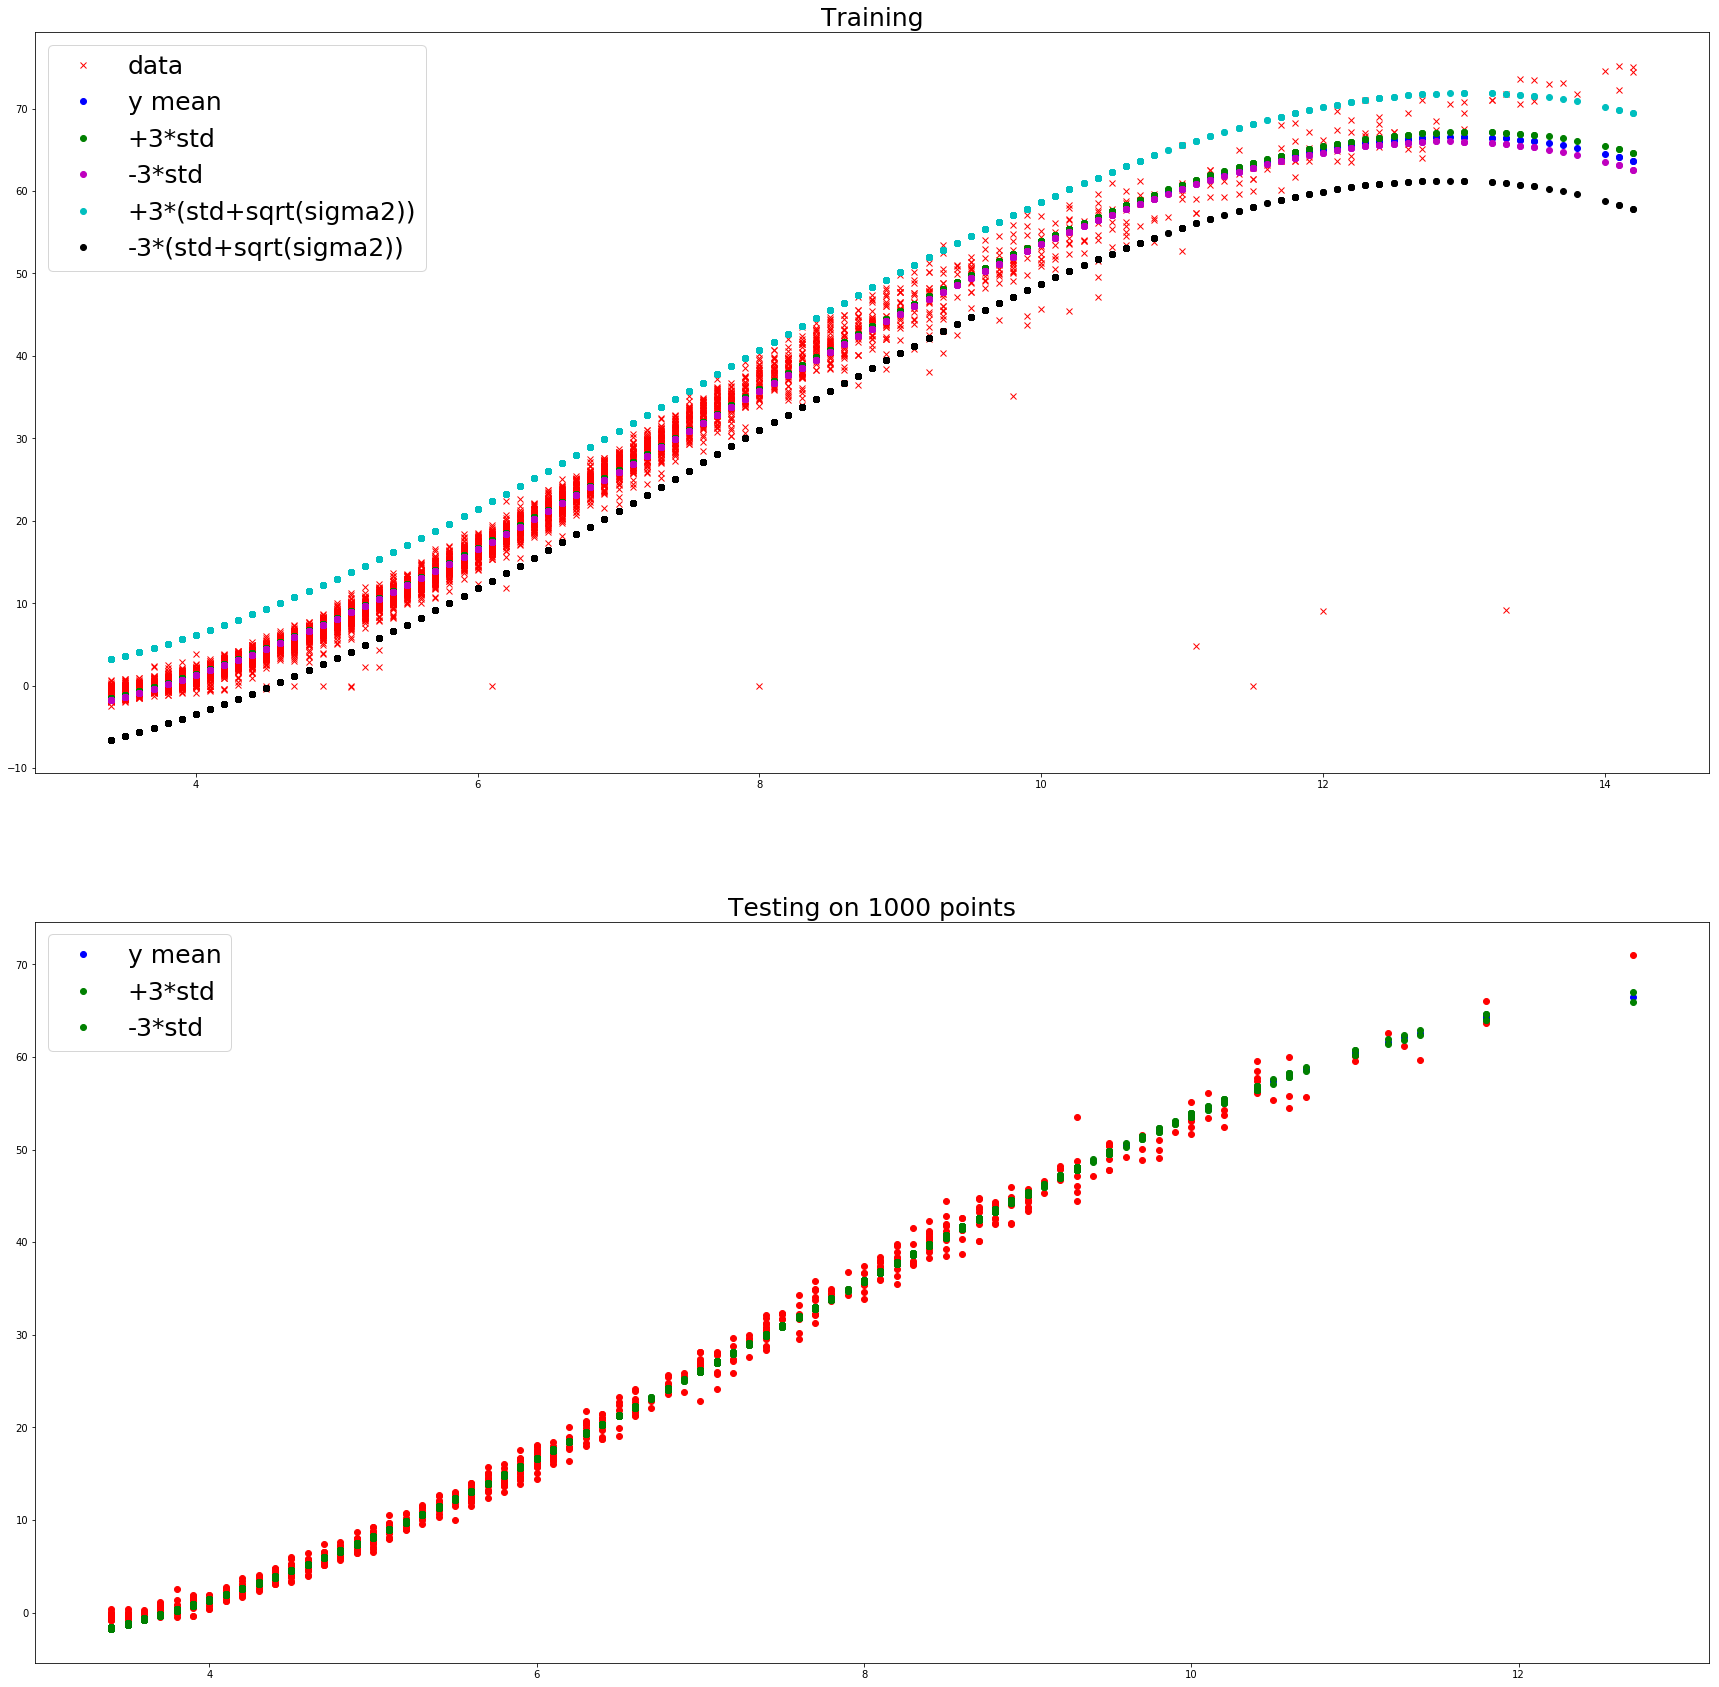

In [12]:
y_mean,y_std,beta_mean,beta_cov=Bayes_reg(x3_cleaned2[0:7000],y3_cleaned2[0:7000],x3_cleaned2[1000:2000],y3_cleaned2[1000:2000],2.5,1,3)

### Novelty detection
To obtain a novelty threshold for the residual errors, one must consider the noisy nature of the data set. As mentioned previously, the data is considered to have noise, centered about the mean value, with normal distribution i.e a  mean of zero and variance of $ \sigma^{2} $. If this noise is assumed to be constant across the domain (which isn't necessarily true), then a cut-off point can be chosen by condidering the feature of a Guassian distribtion that 99% of the data points must lie within $ -3\sigma<0<3\sigma $. 

To conduct outlier analysis, we take the weighs vector, $W$ that was trained on the *undmaged* data, then from this create a new vector of predicted values $y$, with a length equal to the number of undamaged and damaged data points between the limits. This allows one to conduct the Z-score, or standard score, of the data, as given below.

$$ z=\frac{y_{i}-\mu_{i}}{\sigma_{i}} $$

This normalises the data points such that the data set follows a standard normal distribution, with a mean of zero and standard deviation of one.

The z-score and residuals are shown, with the associated Bayesian regession plot, below. 


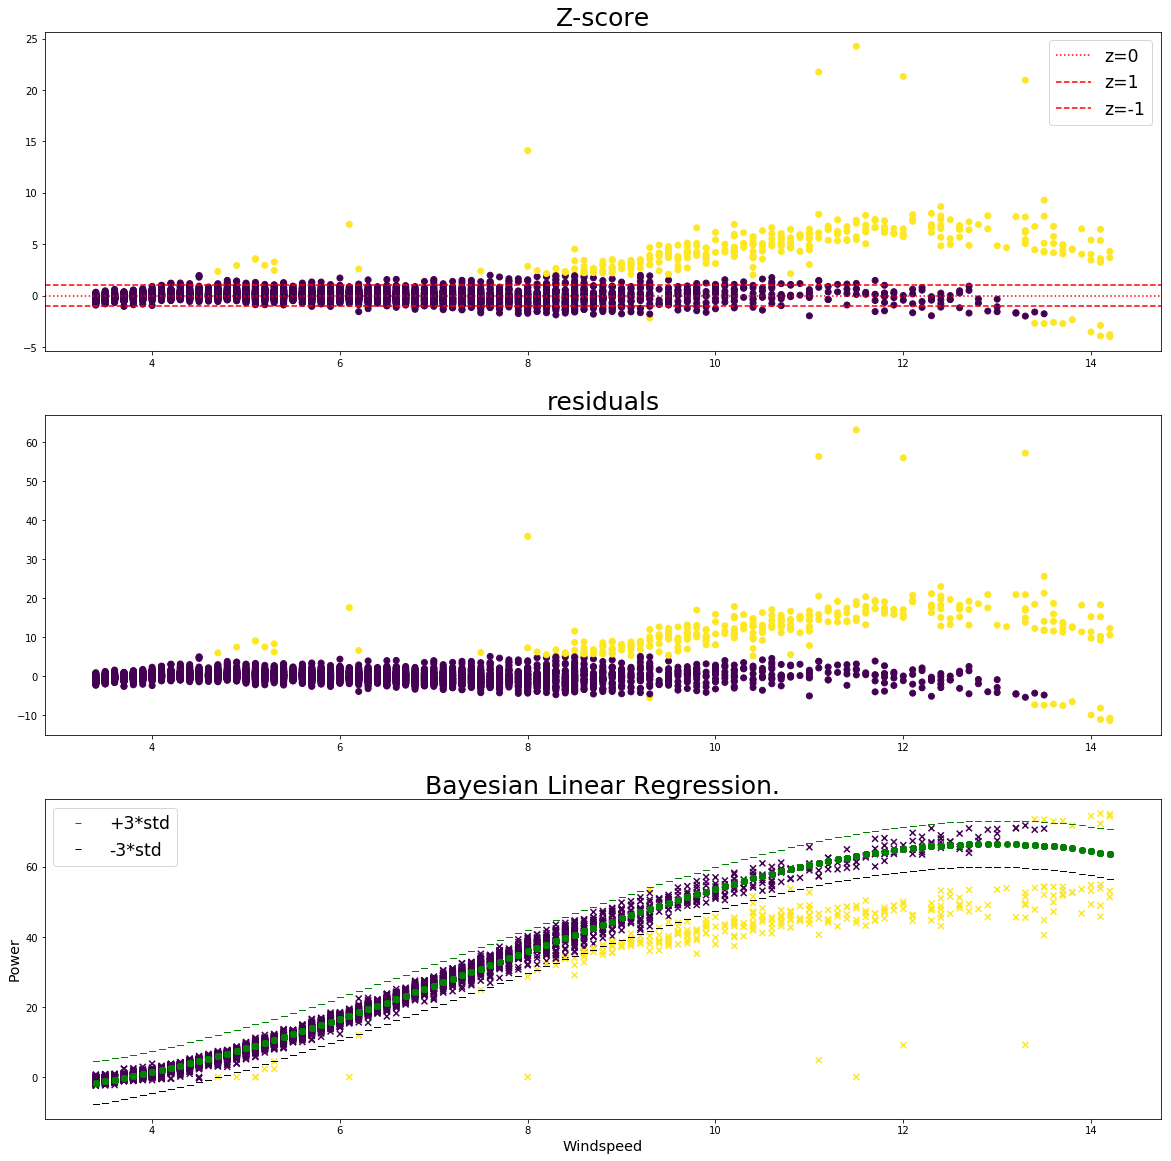

In [104]:
def polynomial(x,num_basis):
        X=np.ones((len(x),(num_basis+1)))# creates N by num_basis+1 matrix
        x1=np.reshape(x,(len(x),))
        for i in range(1,num_basis+1):
            
            X[:,i]=x1**i
        return (X)

length=len(x3_cleaned2)#length of all data inc outliers 
X_plt=polynomial(x3_cleaned2,3)#basis set, cubic. 
y_mean_plt=np.matmul(X_plt,beta_mean)#finding mean based on previously learnt beta. 
y_cov_plt=np.matmul(np.matmul(X_plt,beta_cov),np.transpose(X_plt))
y_var_plt=np.diag(y_cov_plt)
y_std_plt=np.reshape(np.sqrt(y_var_plt),(len(np.sqrt(y_var_plt)),1))
z_score=np.divide((np.subtract(y_mean_plt,y3_cleaned2)),(y_std_plt+2.5))
outliers=np.transpose(np.array(np.where(np.absolute(np.reshape(z_score,(len(x3_cleaned2),)))>=2)))#indeces of the data points with a 
#......z score greater than a set threshold  
colours=np.ones_like(x3_cleaned2)#colours vector
colours[outliers]=2#changing colour of outliers 
plt.figure(figsize=(20,20))
plt.subplot(311)
plt.scatter(x3_cleaned2,z_score,c=colours)
plt.title('Z-score',fontsize=25)

plt.axhline(y=0,color='r',linestyle=':',label='z=0')
plt.axhline(y=1,color='r',linestyle='--',label='z=1')
plt.axhline(y=-1,color='r',linestyle='--',label='z=-1')
plt.legend(fontsize='xx-large')

plt.subplot(312)
residual=y_mean_plt-y3_cleaned2

plt.scatter(x3_cleaned2,residual,c=colours)
plt.title('residuals',fontsize=25)
plt.subplot(313)
plt.scatter(x3_cleaned2,y3_cleaned2,marker='x',c=colours)
plt.plot(x3_cleaned2,y_mean_plt,'go')
plt.plot(x3_cleaned2,y_mean_plt+3*(y_std_plt+2),'g_',label='+3*std')
plt.plot(x3_cleaned2,y_mean_plt-3*(y_std_plt+2),'k_',label='-3*std')
plt.title('Bayesian Linear Regression.',fontsize=25)
plt.ylabel('Power', fontsize='x-large')
plt.xlabel('Windspeed', fontsize='x-large')
plt.legend(fontsize='xx-large')
plt.show()




            
               

## Comparing Frequentist and Bayesian Regression.
Frequentist regression and Bayesian regression are both parametric methods; meaning they both have a functional form and hence both require the selection of a basis function.   
A bonus of the  Bayesian apporach, as opposed the frequenist approach, is that it is sensitive to overiftting, through the use of the regularisation term. Frequentist regression assumes that everything that can be known about the parameters comes from the data, whereas the Bayesian approach allows prior beliefs about what the parameters should look like to be included into the model. 

Bayesian regession also tells us more about the data; the posterior distribution of model parameters allows the uncertainty to be quantified. In this way, the posterior distribution will be more spread out if there are fewer data points so that we do not have false confidenece in our prediction. 

A good way of comparing frequentist regression with Bayesian regression is through computational cost. Bayesian Regression involves finding the inverse of the covariance matrix , where the computational complexity is proportional to $N^{3}$ whereas the complexity of frequentist is proportional to $K^{2}N$. Given that $K<<N$, the computational cost of Bayesian regression is much greater than that of Frequentist regression.

# Guassian Process Regression

An alternative form of regression utilises Guassian Processes. In this system, rather than a prior distribution over  $\beta$ inducing a corresponding prior distirbution over functions $Y(X,\beta)$, we abandon the parametric apporoach and instead define a prior probability over the functions directly. 

Formally a Guassian Process (GP) is a collection of random variables, such that any finite number of them have a joint Guassian distribution. The mean $m(x)$ and covariance function $k(x,x^{'})$ of a real process $f(x)$ are given by 

$$ m(x)=E[f(x)] $$ 
$$ k(x,x^{'})=E[(f(x)-m(x))(f(x^{'})-m(x^{'})] $$ 

From this, a GP is writen as 

$$ f(x)\sim GP(m(x),k(x,x^{'}))$$ 

The covariance function used for this regression was a Radial Basis Function, given by 

$$cov(f(x),f(x^{'}))= k(x,x^{'})=exp(-||x-x^{'}||^{2}/2\sigma^{2}) $$

The covariance function  is chosen such that, for point $x_n$ and $_m$ within the input array (windspeeds) that are similar, the corresponding values predicted by the GP  will be more strongly correlated. Given that an RBF it is a function of the Euclidian distance between the two points, it is clear that it acts as a similarity measure. Altering the value of $\sigma$ changes the effect that the seperation has on the value of the covariance function, this affects the smoothness of the resulting curve. 

## Predicting  using a GP

When the data is noisy, as we have in this case, we assume that we have independant, identically distributed Guassian noise $\epsilon$, with a variance $ \sigma_{n}^{2}$. This then is added to the prior 

$$cov(f(x),f(x^{'}))= k(x,x^{'}) + \sigma_{n}^{2}\delta(x,x^{'}) $$


where $\delta(x,x^{'})$ is the Kronecker delta function. 

Given the assumption assumtpion in GP that the data can be represented as a sample from a multivariate Guassian Distribution, we have the joint distribution of the training outputs to the test outputs according to the prior given by 

$$ \begin{bmatrix}y \\f*\end{bmatrix}\sim \mathcal{N}(0,\begin{bmatrix}K(X,X)+\sigma_{n}^{2}I & K(X,X*) \\ K(X*,X) & K(X*,X*) \end{bmatrix} $$ 

We are interested in the conditional probability $p(y*|X,y,X*)$; how likely a certain prediction for y* is, given the data. This distribution has a mean and variance given by 

$$ \bar f* =K(X*,X)[K(X,X)+\sigma_{n}^{2}I]^{-1}y $$ 

$$ cov(f*)=K(X*,X*)-K(X*,X)[K(X,X)+\sigma_{n}^{2}I]^{-1}K(X,X*)$$ 



## GPR on the wind turbine data. 
The following figure shows GPR being performed on the *training* Stephenson data set. 

In [14]:
import GPy
import plotly
plotly.tools.set_credentials_file(username='joe-auty',api_key='bMaEPw9FrWiqazTD91wd')
GPy.plotting.change_plotting_library('plotly')

C:\Users\Joe Auty\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [15]:

kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
X,Y=x3_cleaned_out[0:1000],y3_cleaned_out[0:1000]
m=GPy.models.GPRegression(X,Y,kernel)

In [16]:
# import GPy
# kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
# X,Y=x3_cleaned_out[0:1000],y3_cleaned_out[0:1000]
# m=GPy.models.GPRegression(X,Y,kernel)

In [17]:
m.optimize_restarts(num_restarts = 5)

Optimization restart 1/5, f = 1441.807287769542
Optimization restart 2/5, f = 1441.80728776768
Optimization restart 3/5, f = 1441.807287769047
Optimization restart 4/5, f = 1441.8072877682066
Optimization restart 5/5, f = 1441.8072877919512


In [18]:
from IPython.display import display


In [19]:

fig = m.plot(figsize=(20,10))
GPy.plotting.show(fig,filename='gp_regression')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



C:\Users\Joe Auty\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:318: DeprecationWarning:

plotly.graph_objs.Font is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Font
  - plotly.graph_objs.layout.hoverlabel.Font
  - etc.


C:\Users\Joe Auty\Anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Joe Auty\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



# GP Outlier Analysis
Once the GP has been performed on the training data set. The mean and variance for the whole data can was predicted. From this a Z-score outlier analysis can be performed, as before, to provide indication as to which data points can be considered novel. 

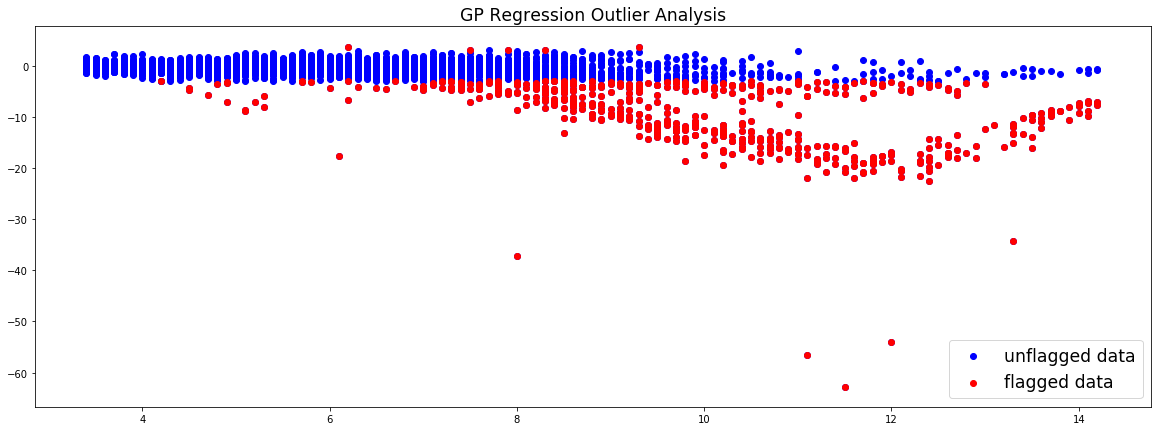

In [20]:
mu_gp,var_gp=m.predict(x3_cleaned2,full_cov=False,Y_metadata=1,kern=None,likelihood=None,include_likelihood=True)
z_score_gp=np.divide((y3_cleaned2-mu_gp),np.sqrt(var_gp))#computing z-score
colours_gp=np.ones_like(x3_cleaned2)#colours vector
outliers_gp=np.transpose(np.array(np.where(np.absolute(np.reshape(z_score_gp,(len(x3_cleaned2),)))>=3)))#location of outliers 
colours_gp[outliers_gp]=2 #changing colour of outliers
plt.figure(figsize=(20,7))
plt.title('GP Regression Outlier Analysis',fontsize='xx-large')
plt.scatter(x3_cleaned2,z_score_gp,c='b',label='unflagged data')
plt.scatter(x3_cleaned2[outliers_gp],z_score_gp[outliers_gp],c='r',label='flagged data')
plt.legend(loc=4,fontsize='xx-large')


## Results
The figures below display GPR and outlier analysis being performed on all three wind turbine data sets. 

In [ ]:
data1=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data1.csv")
data2=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data2.csv")
data3=pd.read_csv(r"C:\Users\Joe Auty\Documents\SURE\data\resureintro\data3.csv")
a=np.size(data1.power_avg)
y1,x1,z1=data1['power_avg'],data1['windspeed_avg'],data1['turbine_state']
y2,x2,y3,x3=data2['power_avg'],data2['windspeed_avg'],data3['power_avg'],data3['windspeed_avg']
t1,t2,t3=data1['timestamp'],data2['timestamp'],data3['timestamp']
z1,z2=data1['turbine_state'],data2['turbine_state']
ind_1,ind_2=np.asarray(np.where((z1!=0) & (z1!=7) & (z1!=5))),np.asarray(np.where((z2!=0) & (z1!=7) & (z1!=5)))#indezes where the turbine isnt off
## cleaning data 1
z1_cleaned=z1[(z1!=0)]
y1_cleaned=np.transpose(np.asarray([y1[i] for i in ind_1]))#all data except where state=0. 
x1_cleaned=np.transpose(np.asarray([x1[i] for i in ind_1]))
ind1_1=np.where((y1_cleaned!=0) & (x1_cleaned>=3) & (x1_cleaned<=14))
y1_cleaned2=y1_cleaned[ind1_1]
x1_cleaned2=x1_cleaned[ind1_1]
x1_cleaned2_1=np.reshape(x1_cleaned2,(len(x1_cleaned2),1))
y1_cleaned2_1=np.reshape(y1_cleaned2,(len(y1_cleaned2),1))
#cleaning data 2
z2_cleaned=z2[(z2!=0)]
y2_cleaned=np.transpose(np.asarray([y2[i] for i in ind_2]))#all data except where state=0. 
x2_cleaned=np.transpose(np.asarray([x2[i] for i in ind_2]))
ind2_1=np.where((y2_cleaned!=0) & (x2_cleaned>=3.2)& (x2_cleaned<=14) )
y2_cleaned2=y2_cleaned[ind2_1]
x2_cleaned2=x2_cleaned[ind2_1]
x2_cleaned2_1=np.reshape(x2_cleaned2,(len(x2_cleaned2),1))
y2_cleaned2_1=np.reshape(y2_cleaned2,(len(y2_cleaned2),1))


# plt.figure(figsize=(20,20))
# plt.subplot(211)
# plt.plot(x1_cleaned2_1[0:1500],y1_cleaned2_1[0:1500],'x')
# plt.subplot(212)
# plt.plot(x2_cleaned2_1,y2_cleaned2_1,'x')



In [31]:
X1,Y1=x1_cleaned2_1[0:1500],y1_cleaned2_1[0:1500]
m1=GPy.models.GPRegression(X1,Y1,kernel)
m1.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 1632.6212065952643
Optimization restart 2/10, f = 1631.020808258091
Optimization restart 3/10, f = 1631.0208082437991
Optimization restart 4/10, f = 1630.525699510198
Optimization restart 5/10, f = 1630.525699549167
Optimization restart 6/10, f = 1631.0208082662584
Optimization restart 7/10, f = 1630.525699517201
Optimization restart 8/10, f = 1630.5256995138707
Optimization restart 9/10, f = 1631.0208085437148
Optimization restart 10/10, f = 1631.0208082514987


In [23]:
X2,Y2=x2_cleaned2_1[0:2000],y2_cleaned2_1[0:2000]
m2=GPy.models.GPRegression(X2,Y2,kernel)
m2.optimize_restarts(num_restarts = 10)

Optimization restart 1/10, f = 2744.4395015493324
Optimization restart 2/10, f = 2743.8090832861712
Optimization restart 3/10, f = 2743.8090832167427
Optimization restart 4/10, f = 2743.809086056374
Optimization restart 5/10, f = 2743.8090832334465
Optimization restart 6/10, f = 2743.809083217134
Optimization restart 7/10, f = 2743.809083220536
Optimization restart 8/10, f = 2743.809083217693
Optimization restart 9/10, f = 2743.8090832275493
Optimization restart 10/10, f = 2743.809083218102


In [32]:
fig1 = m1.plot(figsize=(20,10))
GPy.plotting.show(fig1,filename='gp_regression1')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [25]:
fig2=m2.plot(figsize=(20,10))
GPy.plotting.show(fig2,filename='gp_regression2')

This is the format of your plot grid:
[ (1,1) x1,y1 ]



In [35]:
mu_gp_1,var_gp_1=m1.predict(x1_cleaned2_1,full_cov=False,Y_metadata=1,kern=None,likelihood=None,include_likelihood=True)


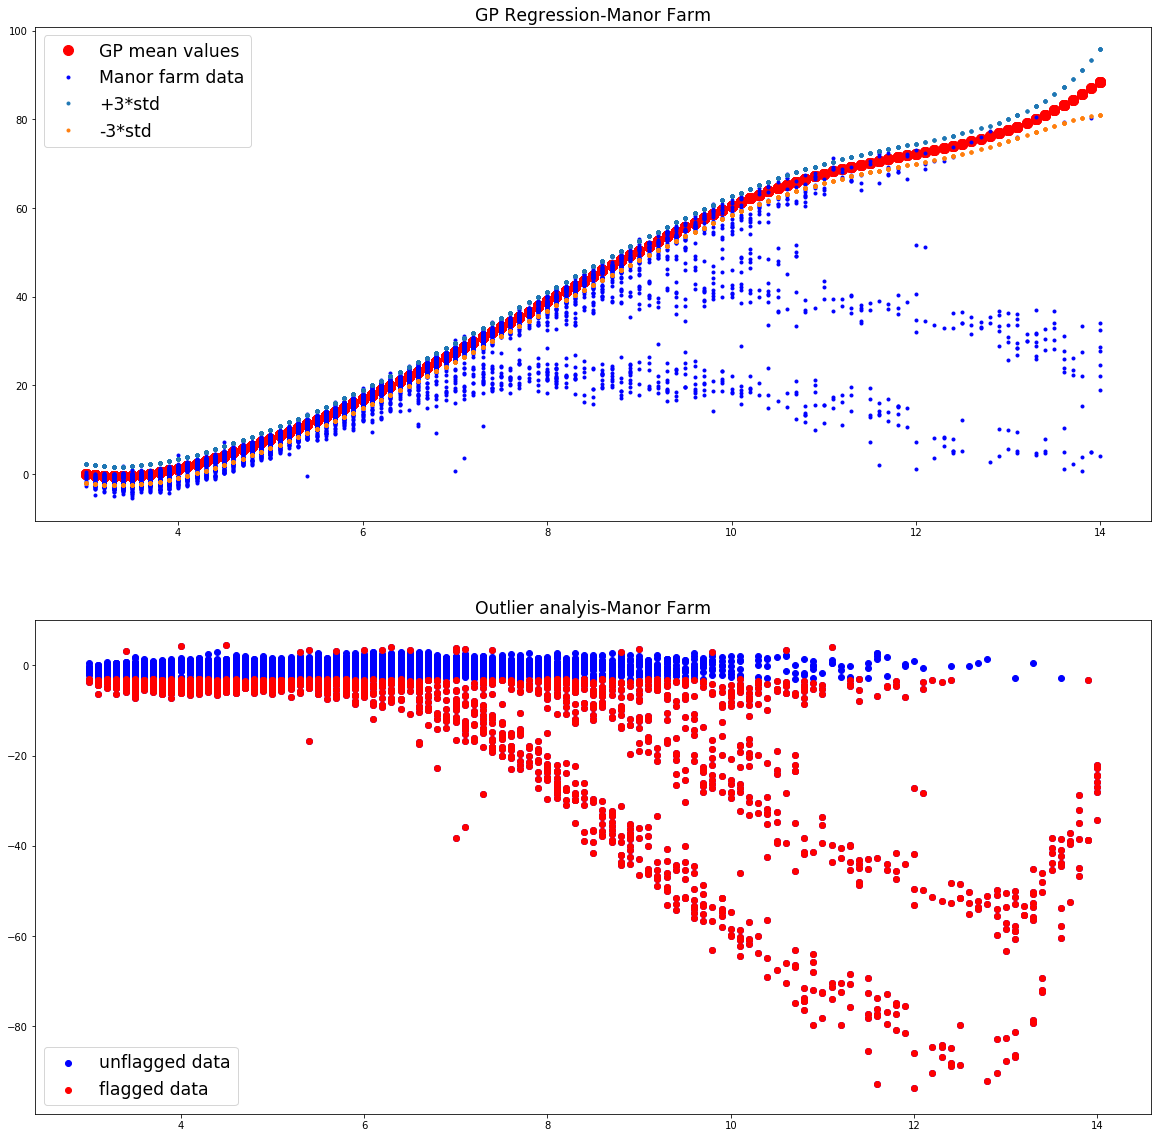

In [36]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title('GP Regression-Manor Farm',fontsize='xx-large')
plt.plot(x1_cleaned2_1,mu_gp_1,'r.',markersize=20,label='GP mean values')
plt.plot(x1_cleaned2_1,y1_cleaned2_1,'b.',label='Manor farm data')
plt.plot(x1_cleaned2_1,(mu_gp_1+3*np.sqrt(var_gp_1)),'.',label='+3*std')
plt.plot(x1_cleaned2_1,(mu_gp_1-3*np.sqrt(var_gp_1)),'.',label='-3*std')
z_score_1=np.divide((y1_cleaned2_1-mu_gp_1),np.sqrt(var_gp_1))
plt.legend(fontsize='xx-large')
plt.subplot(212)
plt.title('Outlier analyis-Manor Farm',fontsize='xx-large')
plt.scatter(x1_cleaned2_1,z_score_1,c='b',label='unflagged data')
outliers_gp_1=np.transpose(np.array(np.where(np.absolute(np.reshape(z_score_1,(len(x1_cleaned2_1),)))>=3)))#location of outliers 
plt.scatter(x1_cleaned2_1[outliers_gp_1],z_score_1[outliers_gp_1],c='r',label='flagged data')
plt.legend(fontsize='xx-large')
plt.show()


In [28]:
mu_gp_2,var_gp_2=m2.predict(x2_cleaned2_1,full_cov=False,Y_metadata=1,kern=None,likelihood=None,include_likelihood=True)

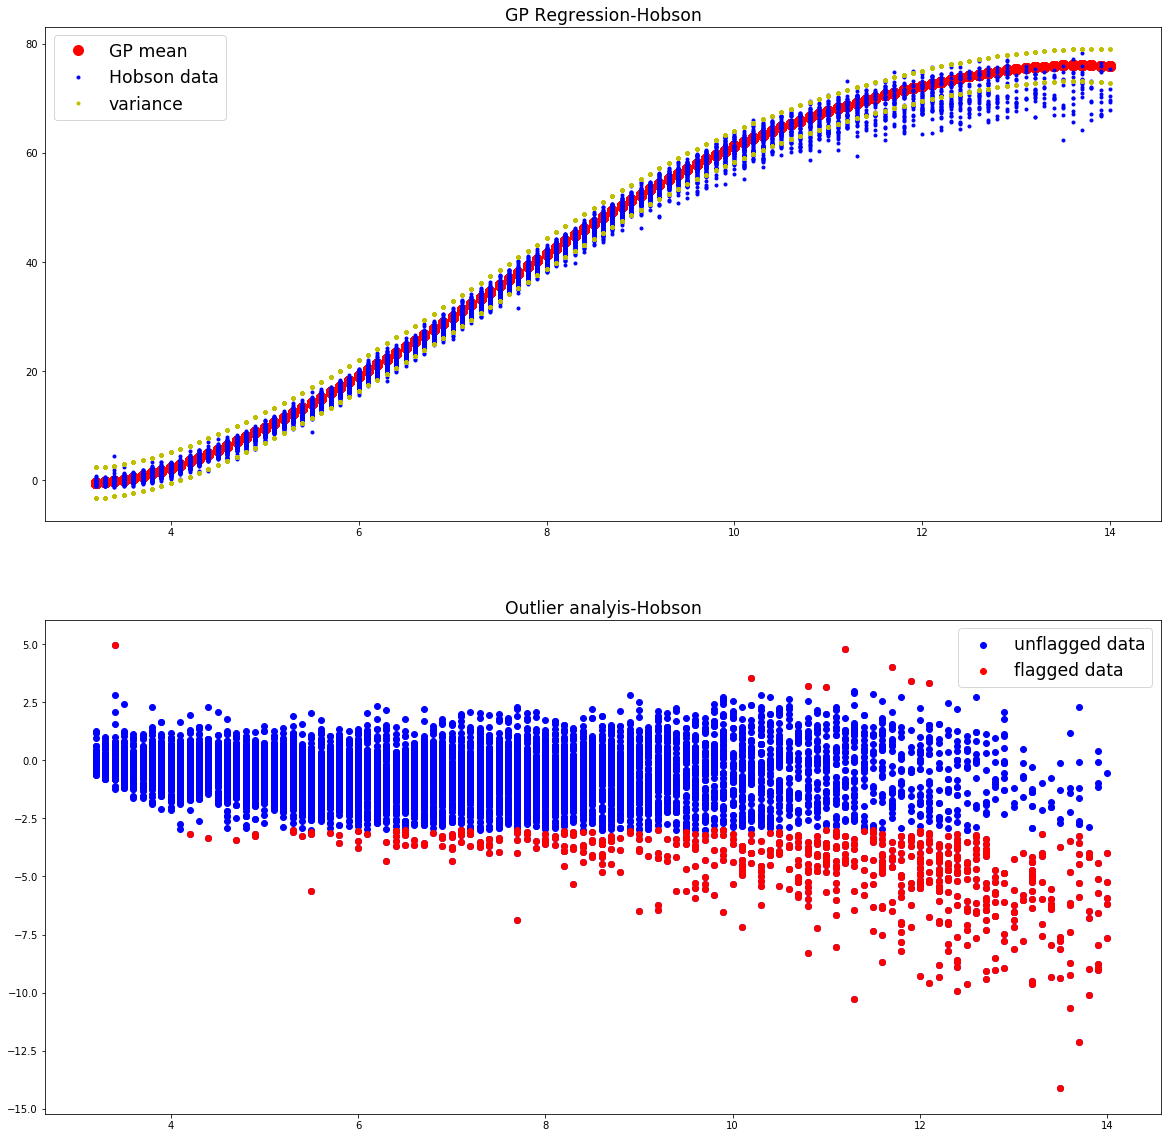

In [29]:
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.title('GP Regression-Hobson',fontsize='xx-large')
plt.plot(x2_cleaned2_1,mu_gp_2,'r.',markersize=20,label='GP mean')
plt.plot(x2_cleaned2_1,y2_cleaned2_1,'b.',label='Hobson data')
plt.plot(x2_cleaned2_1,(mu_gp_2+3*np.sqrt(var_gp_2)),'y.',label='variance')
plt.plot(x2_cleaned2_1,(mu_gp_2-3*np.sqrt(var_gp_2)),'y.')
z_score_2=np.divide((y2_cleaned2_1-mu_gp_2),np.sqrt(var_gp_2))
plt.legend(fontsize='xx-large')
plt.subplot(212)
plt.title('Outlier analyis-Hobson',fontsize='xx-large')
plt.scatter(x2_cleaned2_1,z_score_2,c='b',label='unflagged data')
outliers_gp_2=np.transpose(np.array(np.where(np.absolute(np.reshape(z_score_2,(len(x2_cleaned2_1),)))>=3)))#location of outliers 
plt.scatter(x2_cleaned2_1[outliers_gp_2],z_score_2[outliers_gp_2],c='r',label='flagged data')
plt.legend(fontsize='xx-large')
plt.show()


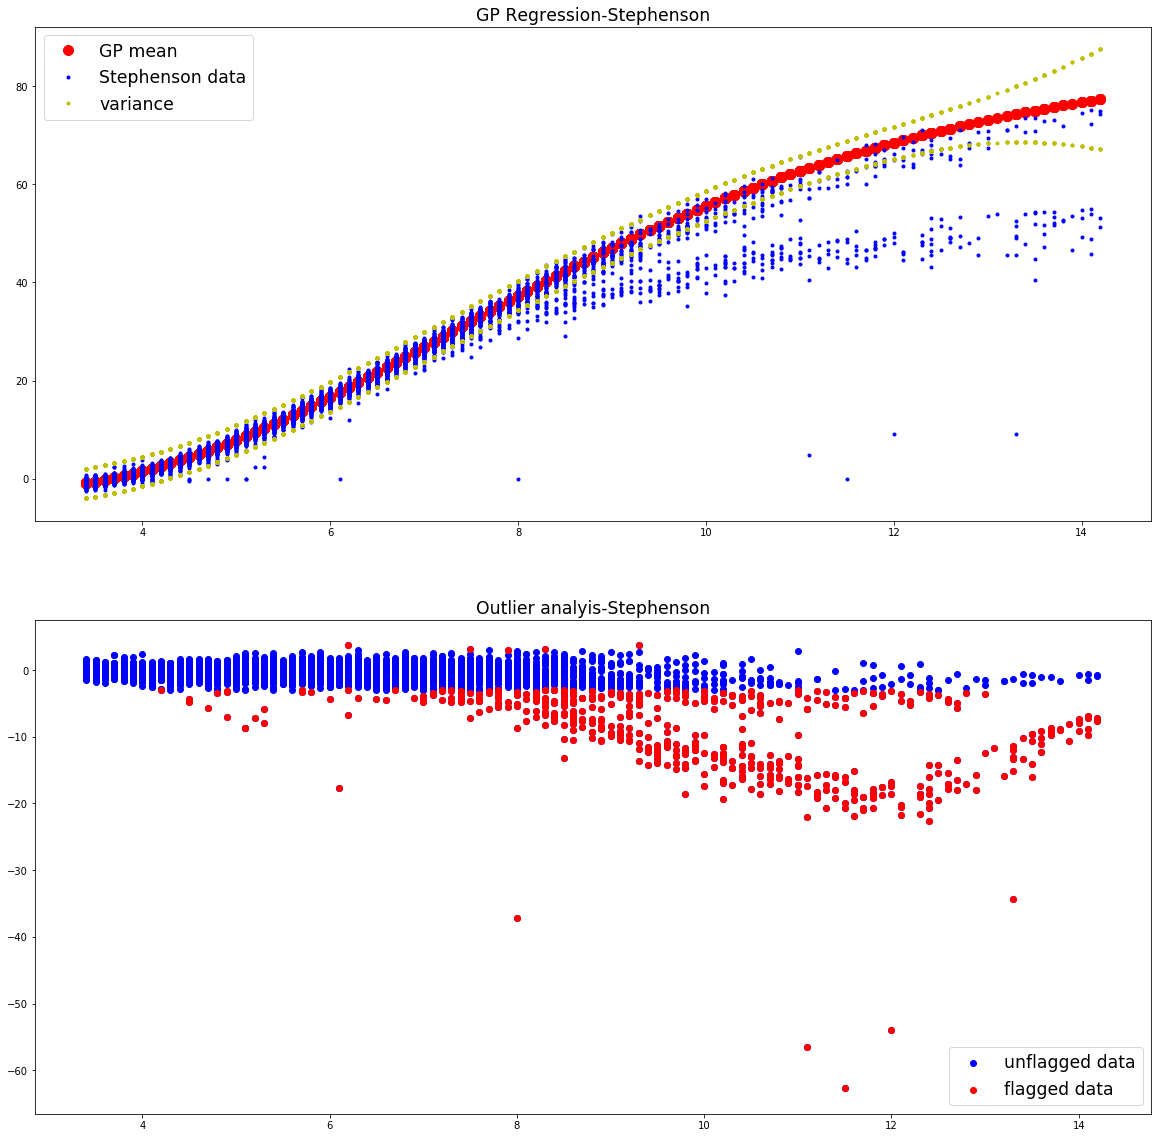

In [30]:
plt.figure(figsize=(20,20))

plt.subplot(211)
plt.title('GP Regression-Stephenson',fontsize='xx-large')
plt.plot(x3_cleaned2,mu_gp,'r.',markersize=20,label='GP mean')
plt.plot(x3_cleaned2,y3_cleaned2,'b.',label='Stephenson data')
plt.plot(x3_cleaned2,(mu_gp+3*np.sqrt(var_gp)),'y.',label='variance')
plt.plot(x3_cleaned2,(mu_gp-3*np.sqrt(var_gp)),'y.')
plt.legend(fontsize='xx-large')
plt.subplot(212)
plt.title('Outlier analyis-Stephenson',fontsize='xx-large')
plt.scatter(x3_cleaned2,z_score_gp,c='b',label='unflagged data')
plt.scatter(x3_cleaned2[outliers_gp],z_score_gp[outliers_gp],c='r',label='flagged data')
plt.legend(loc=4,fontsize='xx-large')
plt.show()

## Conclusion 

An important benefit of GPR is that the uncertainity of the fitted GP increases as training data points become more sparce. 
Additonally, GPR overcomes the issue of having to carefully select a basis function, which is associated with the other two methods, hence overfitting becomes less of an issue. However GPR does still require the selection of a covarianmce function, which still requires some degree of knowledge about how the data behaves, however the ability to choose a covariance function makes GP's very versatile.

One major limitation of GPR is the computational cost, which is proportional to $N^3$. In order to fully capture the variance of the noise so that the chance of *normal* data points being flagged as outliers is reduced, the GP has to be trained on around 3000 data points. 

The GP regression implimented in this report assumes that the residuals on the predictions have independant and indentically distributed Guassian distributions that are not dependent on the inputs. However this may not necessarily be the case. Furthermore, the distribtuion of the residuals may not be Guassian. Therefore the introduction of a heteroscedastic noise model could be an potential future addition to the GP. 